
# 🐉 Pokémon Dataset – Exploratory Data Analysis

This notebook presents a **Kaggle-style exploratory data analysis (EDA)** of a Pokémon dataset.
We analyze Pokémon characteristics, stats, types, generations, and Legendary status to uncover
patterns that inform downstream machine learning models.


In [ ]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [ ]:

# Load dataset
df = pd.read_csv("pokemon_dataset.csv")
df.head()


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height_m,Weight_kg,Base_Experience,Capture_Rate,Total
0,Pokemon_1,Fairy,Ice,75,147,65,145,135,103,1,False,5.15,861.5,304,66,670
1,Pokemon_2,Fire,Ice,90,99,127,58,99,88,1,False,2.98,975.5,162,120,561
2,Pokemon_3,Electric,Psychic,112,56,87,49,69,120,7,False,5.44,135.1,207,91,493
3,Pokemon_4,Grass,NaN,100,119,97,47,140,86,8,False,3.12,373.7,224,42,589
4,Pokemon_5,Steel,Fairy,49,108,106,61,35,78,6,False,1.62,563.8,206,73,437



## 📂 Dataset Overview

The dataset contains Pokémon combat stats, typing information,
Pokédex attributes, and Legendary status.


In [3]:

df.shape


(180, 16)

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   Type 1           180 non-null    object 
 2   Type 2           159 non-null    object 
 3   HP               180 non-null    int64  
 4   Attack           180 non-null    int64  
 5   Defense          180 non-null    int64  
 6   Sp. Atk          180 non-null    int64  
 7   Sp. Def          180 non-null    int64  
 8   Speed            180 non-null    int64  
 9   Generation       180 non-null    int64  
 10  Legendary        180 non-null    bool   
 11  Height_m         180 non-null    float64
 12  Weight_kg        180 non-null    float64
 13  Base_Experience  180 non-null    int64  
 14  Capture_Rate     180 non-null    int64  
 15  Total            180 non-null    int64  
dtypes: bool(1), float64(2), int64(10), object(3)
memory usage: 21.

In [5]:

df.describe()


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Height_m,Weight_kg,Base_Experience,Capture_Rate,Total
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,81.322222,96.611111,87.244444,100.844444,89.088889,94.311111,4.816667,3.076222,514.920556,216.805556,130.550000,549.422222
std,23.588335,32.508940,29.641361,34.264633,29.447859,37.526198,2.466479,1.460525,273.812790,88.929958,72.616331,71.791205
min,35.000000,41.000000,35.000000,40.000000,35.000000,30.000000,1.000000,0.440000,10.200000,61.000000,6.000000,370.000000
25%,63.000000,71.000000,63.000000,74.000000,66.750000,59.000000,3.000000,1.952500,299.325000,140.250000,64.750000,499.750000
50%,84.000000,98.000000,88.500000,100.500000,90.500000,94.000000,5.000000,3.165000,514.400000,218.000000,133.500000,555.500000
75%,100.000000,124.000000,112.250000,129.250000,115.000000,127.000000,7.000000,4.312500,730.975000,294.500000,192.500000,597.750000
max,120.000000,150.000000,140.000000,160.000000,140.000000,159.000000,9.000000,5.500000,990.700000,358.000000,255.000000,730.000000



## 🔍 Missing Values
Missing values in `Type 2` indicate single-type Pokémon and are expected.


In [6]:

df.isna().sum()


Name                0
Type 1              0
Type 2             21
HP                  0
Attack              0
Defense             0
Sp. Atk             0
Sp. Def             0
Speed               0
Generation          0
Legendary           0
Height_m            0
Weight_kg           0
Base_Experience     0
Capture_Rate        0
Total               0
dtype: int64


## 🧬 Pokémon Type Distribution


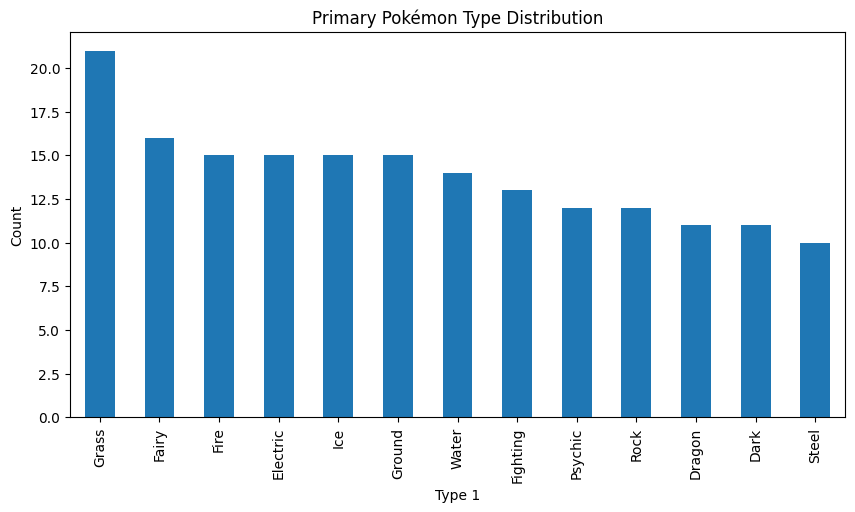

In [7]:

plt.figure(figsize=(10,5))
df['Type 1'].value_counts().plot(kind='bar')
plt.title("Primary Pokémon Type Distribution")
plt.ylabel("Count")
plt.show()



## 🌟 Legendary Pokémon Distribution
Legendary Pokémon form a minority class, motivating advanced evaluation metrics.


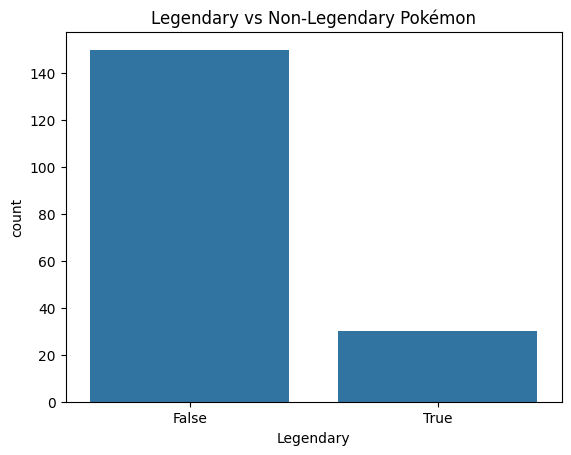

In [8]:

sns.countplot(x='Legendary', data=df)
plt.title("Legendary vs Non-Legendary Pokémon")
plt.show()



## ⚔️ Total Stats Comparison


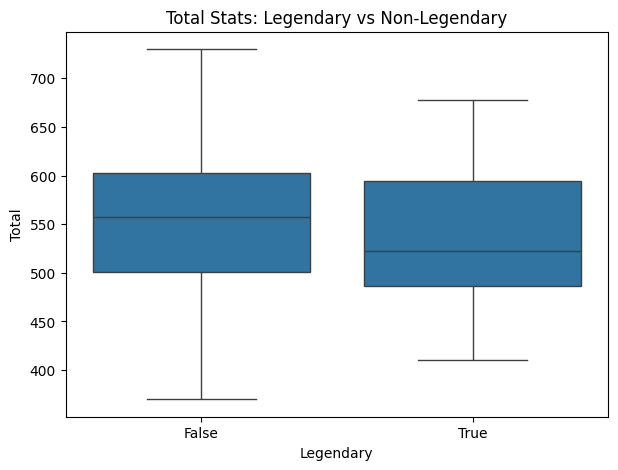

In [9]:

plt.figure(figsize=(7,5))
sns.boxplot(x='Legendary', y='Total', data=df)
plt.title("Total Stats: Legendary vs Non-Legendary")
plt.show()



## 📈 Distribution of Combat Stats


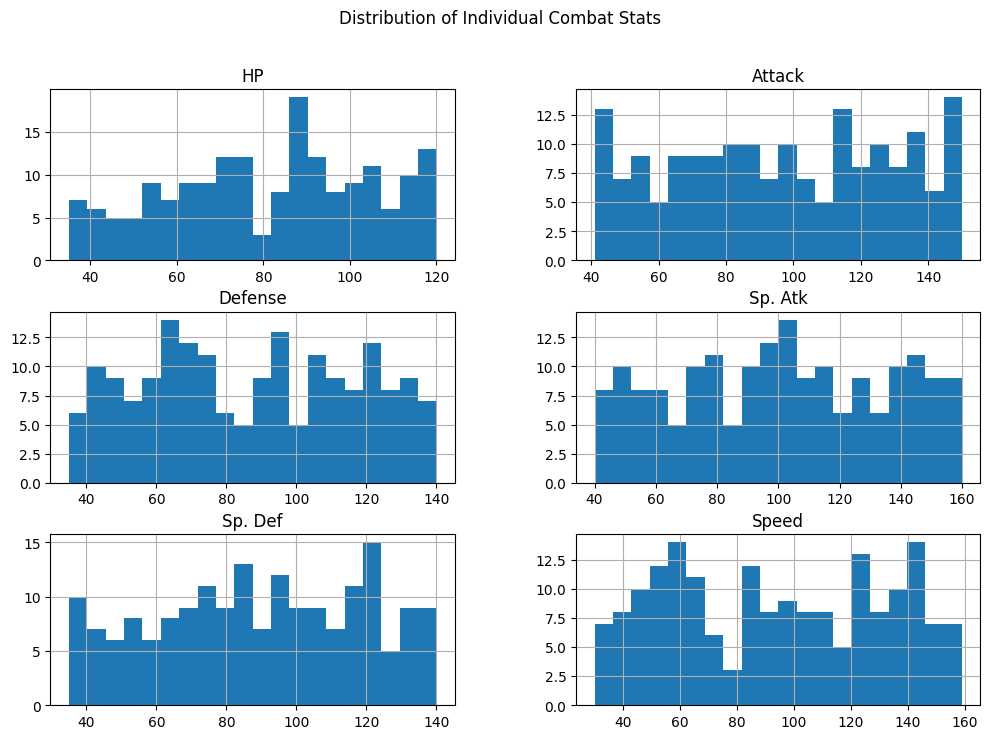

In [10]:

stats = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
df[stats].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Individual Combat Stats")
plt.show()



## 🔥 Correlation Analysis


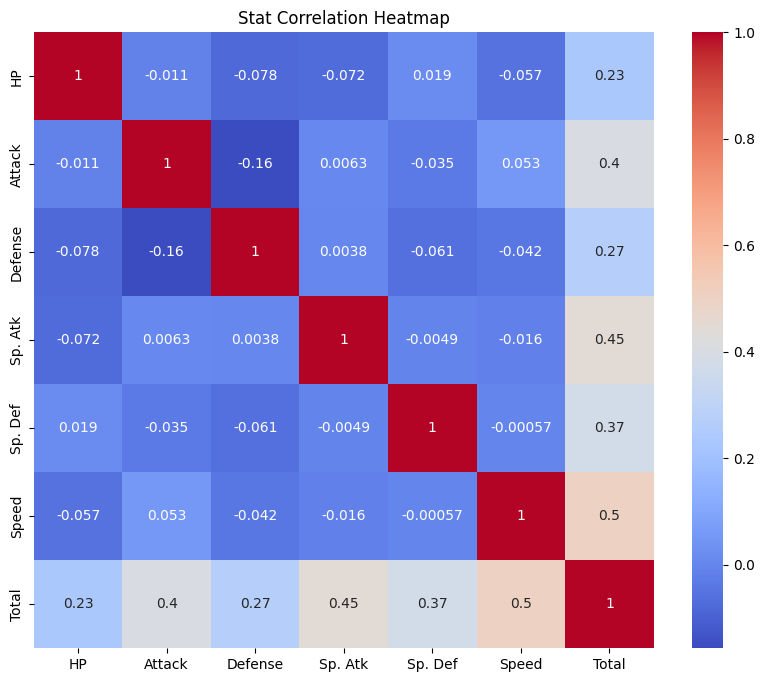

In [11]:

plt.figure(figsize=(10,8))
sns.heatmap(df[stats + ['Total']].corr(), annot=True, cmap='coolwarm')
plt.title("Stat Correlation Heatmap")
plt.show()



## 🧬 Generation Analysis


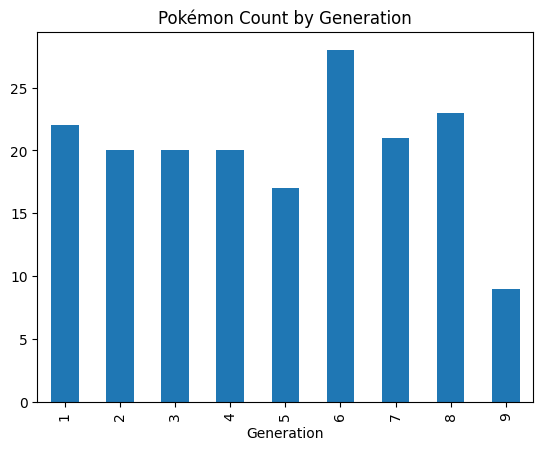

In [12]:

df['Generation'].value_counts().sort_index().plot(kind='bar')
plt.title("Pokémon Count by Generation")
plt.show()



## 📖 Pokédex Attribute Analysis


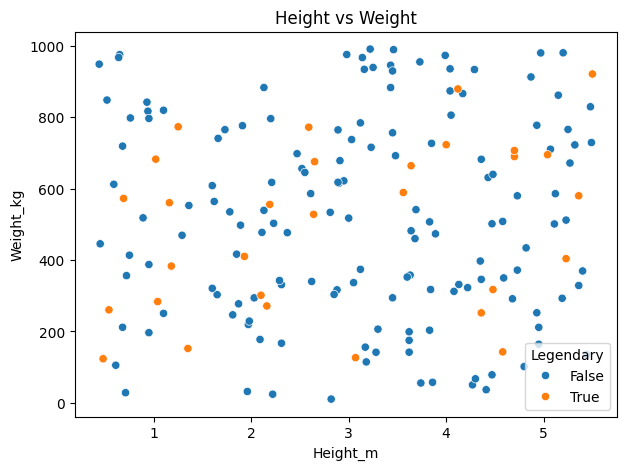

In [13]:

plt.figure(figsize=(7,5))
sns.scatterplot(x='Height_m', y='Weight_kg', hue='Legendary', data=df)
plt.title("Height vs Weight")
plt.show()



## 🛠 Feature Engineering Preview


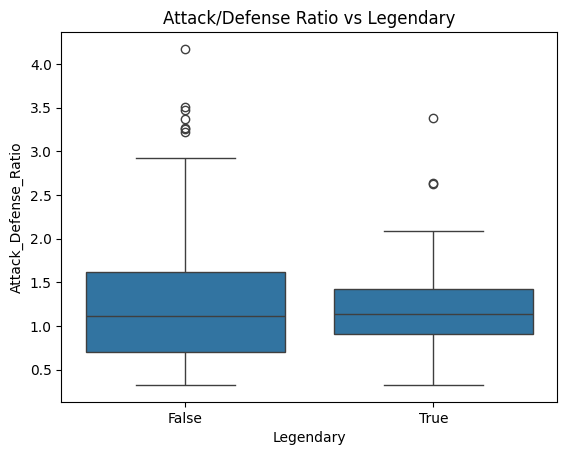

In [14]:

df['Attack_Defense_Ratio'] = df['Attack'] / df['Defense']
df['Speed_to_Total'] = df['Speed'] / df['Total']

sns.boxplot(x='Legendary', y='Attack_Defense_Ratio', data=df)
plt.title("Attack/Defense Ratio vs Legendary")
plt.show()



## ✅ Key Takeaways

• Legendary Pokémon have higher overall stats  
• Offensive stats dominate strength differences  
• Dataset is imbalanced, requiring ROC/PR metrics  
• Feature engineering improves interpretability  

This EDA sets a strong foundation for machine learning.
